Analysis project using the data provided in the file "Grocery Database."

For the start install all the necessary libraries.

In [ ]:
!pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is how we can see what sheets are in the Excel file:

In [3]:
path_to_file = 'drive/MyDrive/Python for Data Analysis by Hanna Pylieva/Data/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

And this is how we can read a specific sheet:

In [ ]:
descr = xl.parse('Fact Summary')
descr

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


You can also read data from Pandas, but there is no way to view the available sheets, and it takes longer to read data.

In [5]:
df = pd.read_excel(path_to_file)

In [ ]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


**0. Initial Data Analysis**

In [ ]:
df.shape # Analyzing the number of rows and columns in the dataset

(50447, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

Checking data type consistency.

In [ ]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Checking for missing values.

In [ ]:
missing_values = df.isnull().sum()
missing_values

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

There is no missing values in dataset

1. We will analyze the total sales volume by product category—this is necessary to understand consumer preferences and optimize the product assortment. This will also help manage inventory more effectively and develop targeted marketing strategies.

In [27]:
df['Total_Sales'] = df['Price'] * df['QTY'] # Calculation of the total volume of sales for each product category
total_sales_by_category = df.groupby('Category')['Total_Sales'].sum().reset_index()
display(total_sales_by_category)

,Category,Total_Sales
0,Bakery & Breakfast,54798.92
1,Beauty,81612.17
2,Beverages,27879.98
3,"Choco, Snacks, Sweets",26858.08
4,"Dairy, Chilled & Eggs",36542.47
5,Frozen,76595.28
6,Fruit & Vegetable,37920.58
7,Health,21046.68
8,Household,25975.36
9,Kitchen & Dining,14785.75


2. Let's analyze the products with the highest and lowest sales volumes to inform our development of a future growth strategy.

In [28]:
sales_by_product = df.groupby('Items')['Total_Sales'].sum().reset_index()
highest_sales_product = sales_by_product.sort_values(by='Total_Sales', ascending=False).head(1)
lowest_sales_product = sales_by_product.sort_values(by='Total_Sales', ascending=True).head(1)

In [ ]:
sales_by_month = df.groupby('Month')['Net Bill Amount'].sum().reset_index()# Analysis of sales fluctuations by month

3.We will develop a chart illustrating the total sales volume across product categories to identify which categories should be prioritized in the formulation of our marketing strategy..

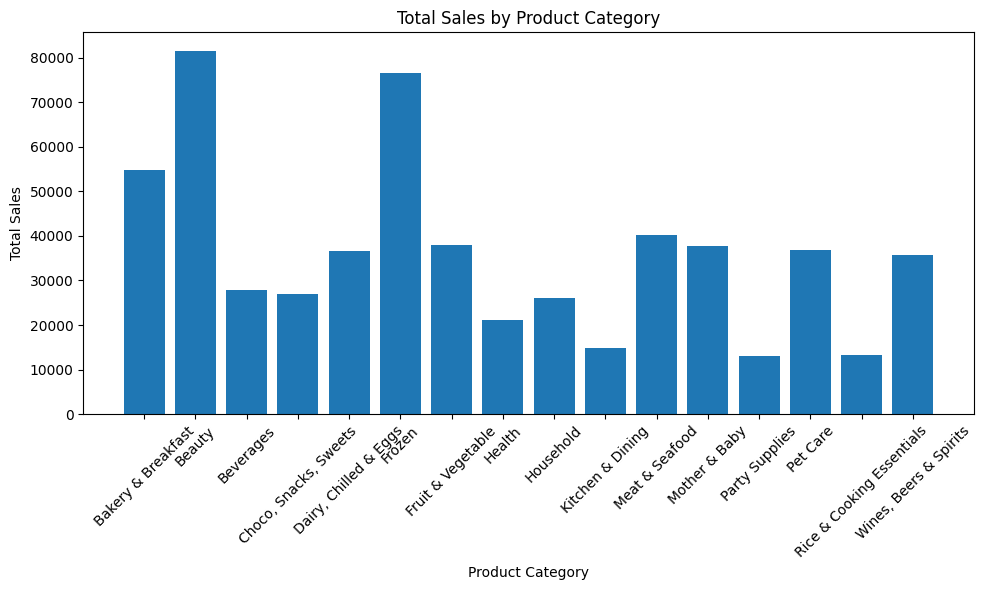

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_category['Category'], total_sales_by_category['Total_Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:**

The "Beauty" and "Fruit & Vegetable" categories show the highest sales volumes. This indicates that these categories are the most popular among consumers. The "Household" and "Party Supplies" categories have the lowest sales volumes. This may suggest low demand for these products or the need for additional marketing efforts to promote them. Overall, the "Beauty," "Fruit & Vegetable," "Kitchen & Dining," and "Meat & Seafood" categories stand out as the main areas with high sales volumes.

4. What about the monthly sales?
Let's develop a monthly sales chart to gain a more detailed understanding of where to concentrate marketing efforts.


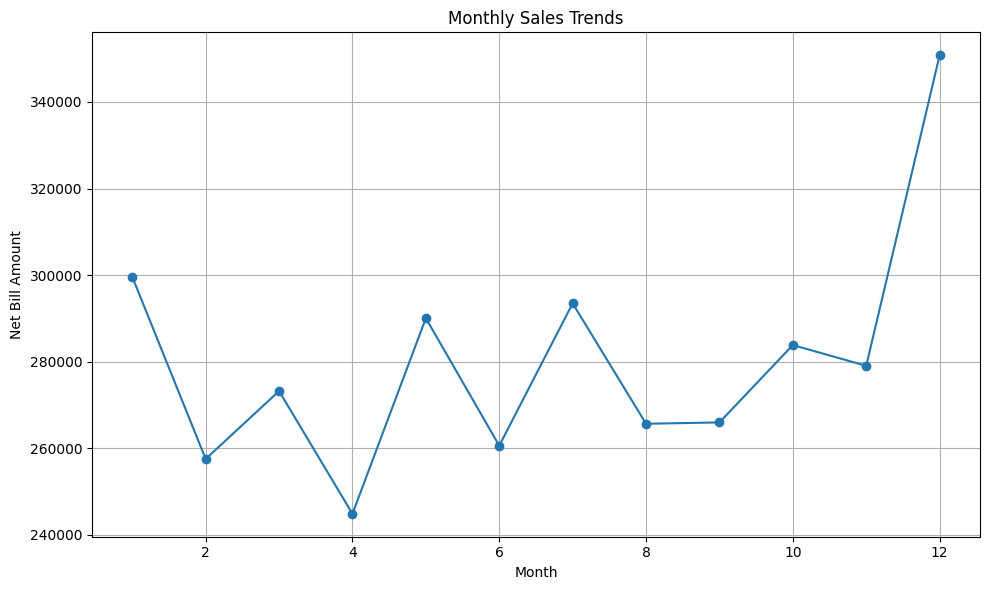

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Month'], sales_by_month['Net Bill Amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Net Bill Amount')
plt.title('Monthly Sales Trends')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusions:**

In December, a sharp increase in sales volumes is observed. This may be related to seasonal factors, such as the holiday season, when consumers typically purchase more goods. A decline in sales is observed in January and April, which may be due to post-holiday saving or other seasonal factors.

**Recommendations:**

Consider increasing inventory and marketing promotions during periods of high demand, especially in December. It may also be advisable to conduct additional advertising campaigns or promotions during sales downturns to stimulate demand.

5.Countunuing our analysis with customer analysis which will help to understand key points of transaction value as well as buying and gender patterns

5.1 Let's calculate the average transaction value per customer first

In [ ]:
average_transaction_value = df.groupby('Membership ID')['Net Bill Amount'].mean().reset_index()
average_transaction_value.columns = ['Membership ID', 'Average Transaction Value']

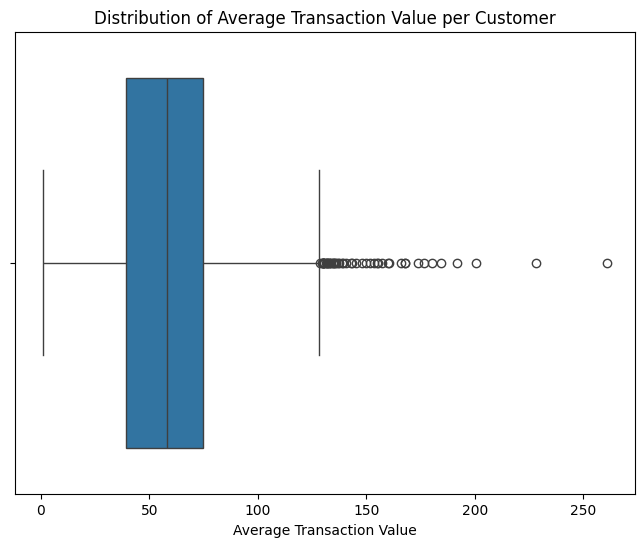

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=average_transaction_value, x='Average Transaction Value')
plt.title('Distribution of Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value')
plt.show()

Accordng to the visualization majority o the customers have an average transaction value clustered around a relatively low range, with a median below 50. There are, however, several customers with significantly higher average transaction values, suggesting that while most customers spend modestly, a few spend substantially more. This distribution can help the business identify different customer segments and tailor their marketing strategies accordingly.

5.2 When it comes to the clients it's exprimly important to know and understand buying patterns of repeat customers and new ones. Let's figure it out.

In [ ]:
customer_purchase_count = df.groupby('Membership ID').size().reset_index(name='Purchase Count')
repeat_customers = customer_purchase_count[customer_purchase_count['Purchase Count'] > 1] # Assuming repeat customers have more than one transaction
new_customers = customer_purchase_count[customer_purchase_count['Purchase Count'] == 1]

In [ ]:
# Spending comparison - average
repeat_customers_avg = df[df['Membership ID'].isin(repeat_customers['Membership ID'])].groupby('Membership ID')['Net Bill Amount'].mean().reset_index()
new_customers_avg = df[df['Membership ID'].isin(new_customers['Membership ID'])].groupby('Membership ID')['Net Bill Amount'].mean().reset_index()
repeat_customers_avg['Customer Type'] = 'Repeat'
new_customers_avg['Customer Type'] = 'New'
combined_customers = pd.concat([repeat_customers_avg, new_customers_avg])

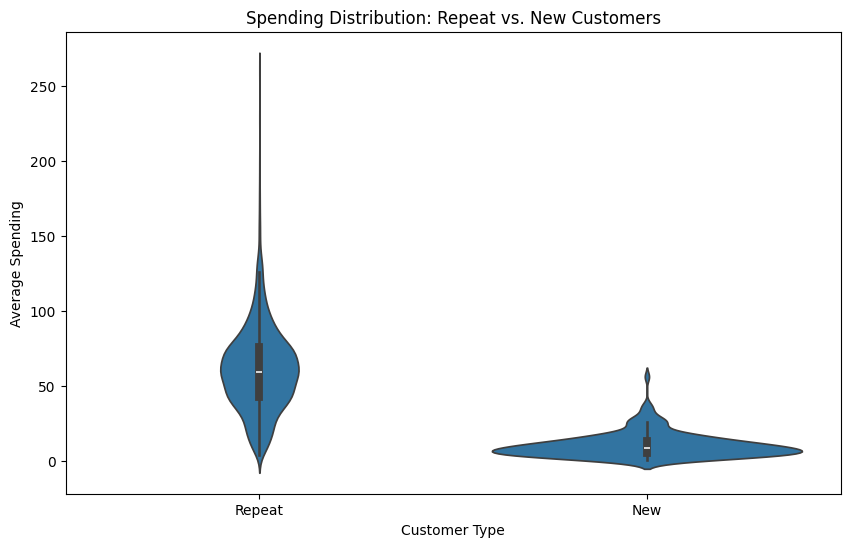

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_customers, x='Customer Type', y='Net Bill Amount')
plt.title('Spending Distribution: Repeat vs. New Customers')
plt.ylabel('Average Spending')
plt.show()

**Conclusion:**

The visualization shows thay repeat customers have a wider range of spending, with some spending significantly more than others. New clients on the other hand tend to have a lower and more consistent average spending range. This suggests that repeat customers are more valuable, likely due to higher engagement and loyalty, leading to increased spending. Therefore, focusing on customer retention strategies might enhance overall sales.

5.3 Also do not forget that buying capability may be different depends on the gender as well, that's why let's analyze buying patterns by gender which will help to adject future developing strategy of the company.

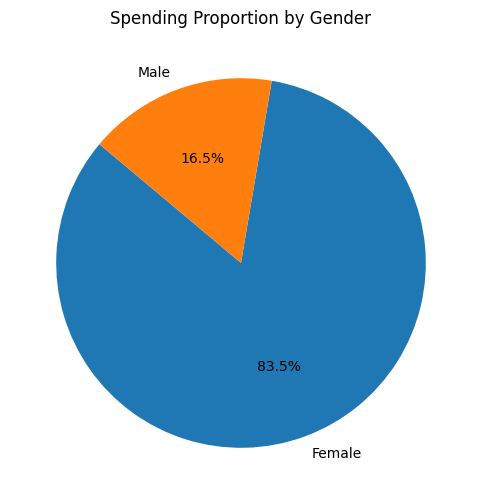

In [ ]:
gender_spending = df.groupby('Gender')['Net Bill Amount'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(gender_spending['Net Bill Amount'], labels=gender_spending['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Spending Proportion by Gender')
plt.show()

**Conclsion:**

The chart indicates that female customers account for 83.5% of the total spending, while male customers contribute 16.5%. This suggests that marketing strategies could be more effectively tailored towards female customers, who are the primary spenders in this dataset.

6. Let's dive deeper into financial results. Let's take a look if the different season has effect on the total revenue?

In [ ]:
# Create function to assign season based on month
def get_season(month):
  if month in [12,1,2]:
    return 'Winter';
  elif month in [3,4,5]:
    return 'Spring';
  elif month in [6,7,8]:
    return 'Summer';
  elif month in [9,10,11]:
    return 'Autumn';

# Apply the function to get season for each transaction
df['Season'] = df['Date'].dt.month.apply(get_season)

# Calculate total revenue for each season
season_revenue = df.groupby('Season')['Net Bill Amount'].sum()



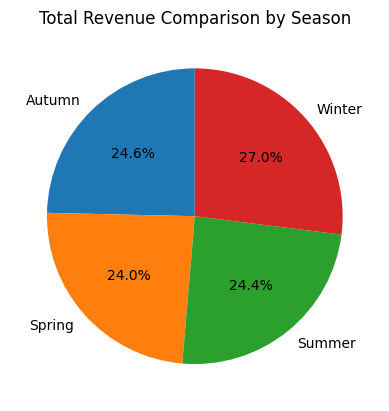

In [ ]:
season_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue Comparison by Season')
plt.ylabel('')
plt.xlabel('')
plt.show()

The revenue is fairly evenly distributed across the seasons, with Winter slightly leading.
This suggests consistent sales throughout the year, with no extreme peaks or troughs in any particular season. However, the slight increase in Winter could indicate higher spending during holiday periods or seasonal promotions.

6.1 To better understand the profitability of each product category, we will calculate the Gross Profit Margin for each category.

In [ ]:
df['Gross_Profit_Margin'] = ((df['Gross Bill Amount'] - df['Product Cost']) / df['Gross Bill Amount']) * 100

In [ ]:
category_profit_margin = df.groupby('Category')['Gross_Profit_Margin'].mean()

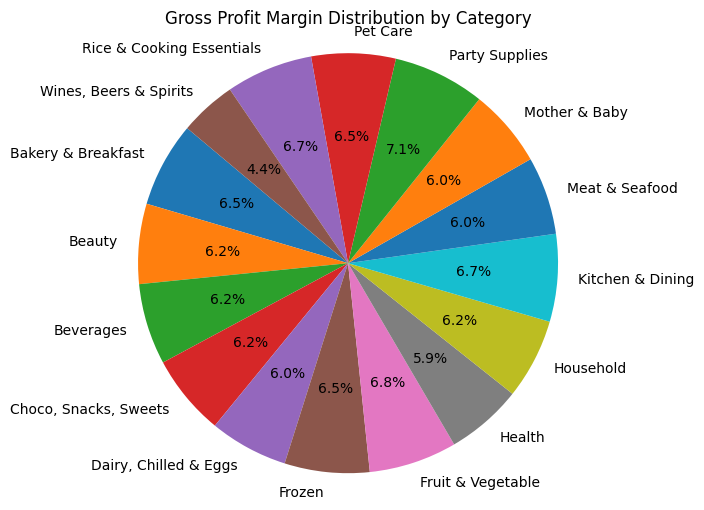

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(category_profit_margin, labels=category_profit_margin.index, autopct='%1.1f%%', startangle=140)
plt.title('Gross Profit Margin Distribution by Category')
plt.axis('equal')
plt.show()

**Conclusion:**
The pie chart shows the distribution of Gross Profit Margin across various product categories.

**Highest Margin:** The category "Mother & Baby" has the highest Gross Profit
Margin at 7.1%, indicating this category is particularly profitable compared to others.

**Moderate Margins:** Categories like "Pet Care," "Fruit & Vegetable," and "Wines, Beers & Spirits" have Gross Profit Margins around 6.7% to 6.8%, showing moderate profitability.

**Lowest Margin:** The "Bakery & Breakfast" category has the lowest margin at 4.4%, suggesting lower profitability which might be due to higher costs or lower pricing strategies.

6.2 Since we already know  the distribution of Gross Profit Margin across various product categories let's check  the cost components by category

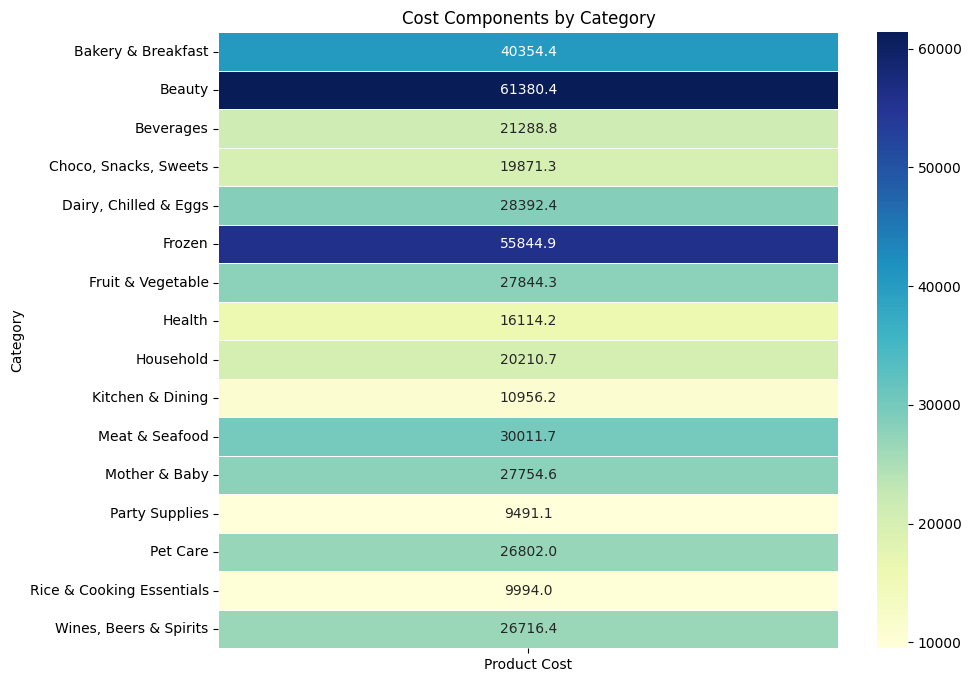

In [ ]:
category_cost = df.groupby('Category')['Product Cost'].sum()

cost_category = pd.DataFrame(category_cost)

plt.figure(figsize=(10, 8))
sns.heatmap(cost_category, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Cost Components by Category')
plt.show()

**Conclusion:**

The heatmap visualization indicates the "Bakery & Breakfast" category has high costs (40354.4) hovewer it is also identified as having the lowest gross profit margin.
High Costs in Bakery & Breakfast: The high costs in the "Bakery & Breakfast" category, combined with its low gross profit margin, suggest that this category is underperforming in profitability, if we take a look at others high costs categories "Beauty" - costs (61380.4) and gross profit margin was moderately low (6.2%) it beeter then Bakery & Breakfast and "Frozen" - costs (55844.9) and the gross profit margin (6.5%) is relatively decent.  



7. Let's analyze how age influences the choice of payment methods.

In [7]:
# Create age group for better catagorization
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '24-34', '35-44', '45-55', '56-65', '66+']
df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [11]:
#Create pivot table
pivot_table = pd.pivot_table(df, index = 'Age group', columns = 'Payment Mode', aggfunc='size', fill_value=0)
pivot_table.reset_index(inplace=True)
display(pivot_table)

Payment Mode,Age group,Card,Cash,Wallet
0,<18,1464,1750,893
1,18-24,3448,2982,3539
2,24-34,3351,3621,3300
3,35-44,3564,2990,3692
4,45-55,4234,3771,4122
5,56-65,736,623,871
6,66+,352,694,450


Overall, younger age groups (<18, 18-24) show a higher preference for wallets, while middle-aged groups (35-55) lean more towards cards. Older groups (56-65, 66+) still favor cash over other methods.

In [14]:
pivot_table = pd.pivot_table(df,index='Age group',columns='Payment Mode',aggfunc='size',fill_value=0)

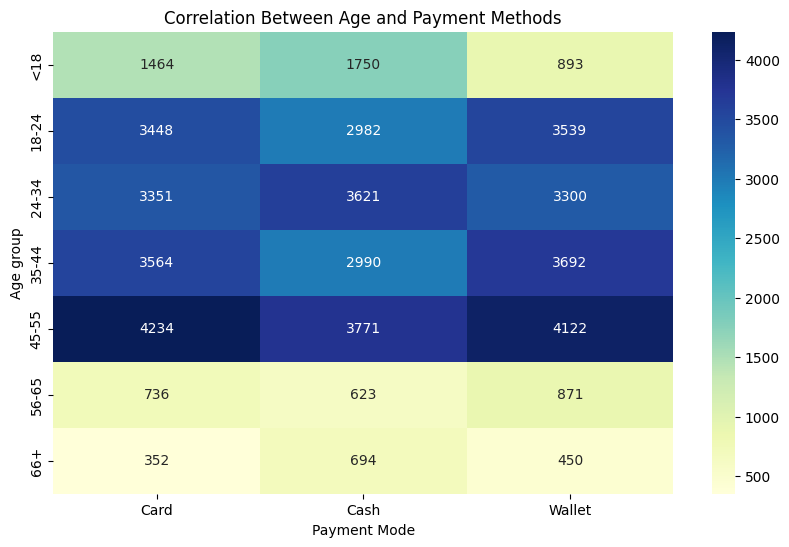

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Correlation Between Age and Payment Methods')
plt.show()

Added visulization for better demonstarion, it confirms that digital payment methods (cards and wallets) increases in younger age groups, while older groups show a stronger inclination towards cash.

8. Now we have data for the of payment methods for the most popular age groups 35-44 and 45-55 let's investigate whether there is a statistically significant difference between two age groups in terms of  their payment method preferences, we will use the z-test statistical test. The level of statistical significance is alpha = 0.05

In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
#Payment methods counts for age froup 35-44
group_35_44 = np.array([3564,2990,3692])
s_35_44 = sum(group_35_44)

In [20]:
#Payment methods counts for age froup 45-55
group_45_55 = np.array([4234, 3771, 4122])
s_45_55 = sum(group_45_55)

In [21]:
#Proportion for eah payment methods
p_35_44 = group_35_44 / s_35_44


In [23]:
alpha = 0.05

In [25]:
# Perform the Z-test for each payment method
for i, method in enumerate(['Card', 'Cash', 'Wallet']):
    count = np.array([group_35_44[i], group_45_55[i]])
    nobs = np.array([s_35_44, s_45_55])
    z_stat, p_value = proportions_ztest(count, nobs)
    print(f"{method} - Z-stat: {z_stat:.2f}, P-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"The difference in the use of {method} between the age groups 35-44 and 45-55 is statistically significant.\n")
    else:
        print(f"The difference in the use of {method} between the age groups 35-44 and 45-55 is not statistically significant.\n")

Card - Z-stat: -0.20, P-value: 0.8395
The difference in the use of Card between the age groups 35-44 and 45-55 is not statistically significant.

Cash - Z-stat: -3.11, P-value: 0.0019
The difference in the use of Cash between the age groups 35-44 and 45-55 is statistically significant.

Wallet - Z-stat: 3.19, P-value: 0.0014
The difference in the use of Wallet between the age groups 35-44 and 45-55 is statistically significant.

